In [1]:
import pandas as pd

In [2]:
# datasets repo: https://github.com/skathirmani/datasets

In [3]:
tweets_url = "https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/narendramodi_tweets.csv"

In [4]:
tweets = pd.read_csv(tweets_url)
tweets.shape


(3220, 14)

In [5]:
tweets.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [6]:
docs = tweets['text']
docs.head()

,text
0,The President's address wonderfully encapsulat...
1,Rashtrapati Ji's address to both Houses of Par...
2,RT @PMOIndia: Empowering the marginalised. htt...
3,RT @PMOIndia: Commitment to welfare of farmers...
4,RT @PMOIndia: Improving the quality of life fo...


## Bag of word analysis
- Frequency of tokens and visualize them in word cloud

In [7]:
docs.iloc[100]

'Sonu Mali from Rajasthan saved a school mate from a cobra attack. We are proud of this courageous youngster. https://t.co/r2rLN5cuKj'

In [8]:
doc = docs.iloc[100]
print(doc)
doc_new = doc.lower()
print(doc_new)
tokens = doc.split(' ')
#len(tokens)

Sonu Mali from Rajasthan saved a school mate from a cobra attack. We are proud of this courageous youngster. https://t.co/r2rLN5cuKj
sonu mali from rajasthan saved a school mate from a cobra attack. we are proud of this courageous youngster. https://t.co/r2rln5cukj


In [9]:
all_tokens = []
for doc in docs:
  doc_new = doc.lower()
  tokens = doc_new.split(' ')
  all_tokens.extend(tokens)
len(all_tokens)

56862

In [10]:
# exercise
hashtags_tokens = [token for token in all_tokens if token.startswith('#')]
len(hashtags_tokens)

831

In [11]:
bow = pd.Series(all_tokens).value_counts()
#bow.head(25)

In [12]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['&amp;', 'rt', ''])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
s = pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])
x = ['b', 'a']

s[~s.index.isin(x)]

,0
c,3
d,4


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from current font.
  func

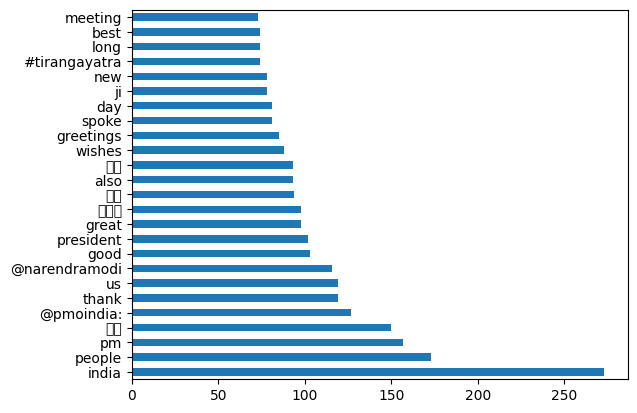

In [14]:
bow_new = bow[~bow.index.isin(stopwords)]
bow_new.head(25).plot.barh();

In [15]:
vocab = bow_new.index.tolist()
len(vocab)

13271

## Wordcloud

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [17]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['&amp;', 'rt', '', 'https', 'co', 'amp', 't'])

In [18]:
docs_str = ' '.join(docs.str.lower())

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords
    ).generate(docs_str)
#plt.imshow(wordcloud);

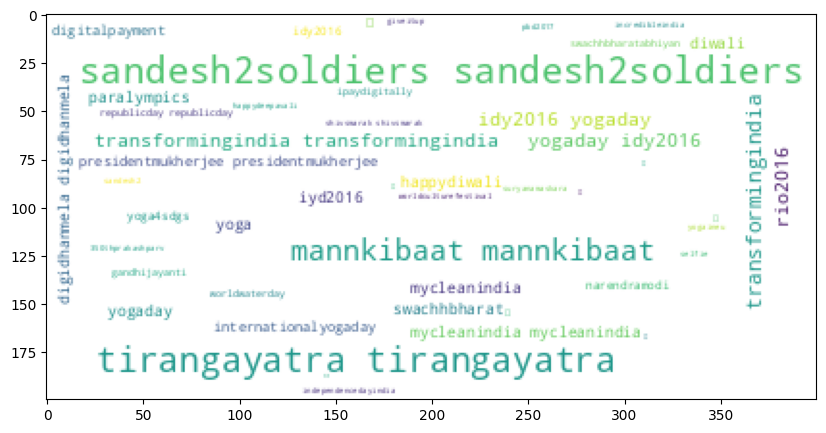

In [19]:
fig = plt.figure(figsize=(14,5))
hashtags_str = ' '.join(hashtags_tokens)
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords
    ).generate(hashtags_str)
plt.imshow(wordcloud);

### Text preprocessing
- Lower case conversion
- Stopwords removal
- Root word identification (stemming, lemmatization)
- Text cleaning
  - Remove special characters
  - Remove regional languages

## Root word identification

In [20]:
words = ['play', 'playing', 'played', 'playful', 'organization', 'slowly']
from nltk.stem.porter import *
stemmer = PorterStemmer()
for word in words:
  print(word, stemmer.stem(word))


play play
playing play
played play
playful play
organization organ
slowly slowli


### Document Term Matrix

In [21]:
reviews_url = 'https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/imdb_subset.csv'
imdb = pd.read_csv(reviews_url)
imdb.shape

(10000, 2)

In [22]:
imdb.head()

,review,sentiment
0,"I can't say that this movie deserves a ten, be...",positive
1,"Yet again, Madhur Bhandarkar takes you on a ri...",positive
2,Angela Lansbury plays Eglantine a middle aged ...,positive
3,"the tortuous emotional impact is degrading, wh...",negative
4,W. Somerset Maugham's Of Human Bondage is supp...,negative


In [23]:
  # doc_new = [stemmer.stem(token) for token in doc.split(' ') if token not in stopwords]


In [24]:
import re

re.sub('[^a-zA-Z\s]', '', 'This is NLP course - 1 101 1234567890 ').strip()

'This is NLP course'

In [25]:
def process_text(doc):
  # Digits removal
  doc_new = re.sub('[^a-zA-Z\s]', '', doc)

  # stopword removal
  doc_new = [token for token in doc_new.split(' ') if token not in stopwords]

  # stemming
  doc_new = [stemmer.stem(token) for token in doc_new]
  return ' '.join(doc_new)

#print(docs.iloc[1])
#print('-----')
#print(process_text(docs.iloc[1]))

In [26]:
docs = imdb['review'].str.lower().apply(process_text)
from sklearn.model_selection import train_test_split

X_docs_train, X_docs_test, y_train, y_test = train_test_split(
    docs,
    imdb['sentiment'],
    test_size=0.2,
    random_state=1
)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=10).fit(X_docs_train)
X_dtm_train = vectorizer.transform(X_docs_train)
X_dtm_test = vectorizer.transform(X_docs_test)
vocab = vectorizer.get_feature_names_out()

In [28]:
len(vocab)

6925

In [29]:
X_dtm_train

<8000x6925 sparse matrix of type '<class 'numpy.int64'>'
	with 681539 stored elements in Compressed Sparse Row format>

In [30]:
vocab = vectorizer.get_feature_names_out()
#list(vocab[:-200])

In [31]:
df_X_dtm_train = pd.DataFrame(X_dtm_train.toarray(), columns=vocab)
df_X_dtm_test = pd.DataFrame(X_dtm_test.toarray(), columns=vocab)

#df_X_dtm_train

In [32]:
df_X_dtm_train.head

<bound method NDFrame.head of       aaron  abandon  abc  abduct  abil  abl  aboard  abomin  abort  abound  \
0         0        0    0       0     0    0       0       0      0       0   
1         0        0    1       0     0    0       0       0      0       0   
2         0        0    0       0     0    0       0       0      0       0   
3         0        0    0       0     0    0       0       0      0       0   
4         0        0    0       0     0    0       0       0      0       0   
...     ...      ...  ...     ...   ...  ...     ...     ...    ...     ...   
7995      0        0    0       0     1    0       0       0      0       0   
7996      0        0    0       0     0    0       0       0      0       0   
7997      0        0    0       0     0    0       0       0      0       0   
7998      0        0    0       0     0    0       0       0      0       0   
7999      0        0    0       0     0    0       0       0      0       0   

      ...  yul  yuppi  zane  zani  zealand  zero  zombi  zone  zoo  zoom  
0     ...    0      0     0     0        0     0      0     0    0     0  
1     ...    0      0     0     0        0     0      0     0    0     0  
2     ...    0      0     0     0        0     0      0     1    0     0  
3     ...    0      0     0     0        0     0      0     0    0     0  
4     ...    0      0     0     0        0     0      0     0    0     0  
...   ...  ...    ...   ...   ...      ...   ...    ...   ...  ...   ...  
7995  ...    0      0     0     0        0     0      0     0    0     0  
7996  ...    0      0     0     0        0     0      0     0    0     0  
7997  ...    0      0     0     0        0     0      0     0    0     0  
7998  ...    0      0     0     0        0     0      0     0    0     0  
7999  ...    0      0     0     0        0     0      0     0    0     0  

[8000 rows x 6925 columns]>

In [33]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(df_X_dtm_train, y_train)
y_test_pred = model.predict(df_X_dtm_test)
y_test_pred

array(['positive', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.8255

### TF-IDF
- Term Frequency - Inverse Document Frequency

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tfidf_vectorizer = TfidfVectorizer(min_df=10).fit(X_docs_train)
X_dtm_train = tfidf_vectorizer.transform(X_docs_train)
X_dtm_test = tfidf_vectorizer.transform(X_docs_test)
vocab = tfidf_vectorizer.get_feature_names_out()

In [37]:
df_X_dtm_train = pd.DataFrame(X_dtm_train.toarray(), columns=vocab)
df_X_dtm_test = pd.DataFrame(X_dtm_test.toarray(), columns=vocab)

In [38]:
df_X_dtm_train

,aaron,abandon,abc,abduct,abil,abl,aboard,abomin,abort,abound,...,yul,yuppi,zane,zani,zealand,zero,zombi,zone,zoo,zoom
0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.11979,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148885,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.00000,0.0,0.045636,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7996,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7997,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7998,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### Disadvantages of DTM
- Sparse matrix
- High dimension data
- Doesn't consider context in which words are appearing
- Vectors are not reusable for other corpus

In [39]:
import gensim

In [40]:
#import gensim.downloader
#glove_vectors = gensim.downloader.load('glove-twitter-25')

In [41]:
#glove_vectors['computer']

In [42]:
import gensim.downloader as api
embedding = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [43]:
embedding.vectors.shape

(3000000, 300)

In [44]:
'a' in embedding

False

In [45]:
len(embedding.index_to_key)

3000000

In [46]:
'classroom' in embedding
embedding['classroom']

array([ 7.47070312e-02, -1.18164062e-01,  5.48362732e-05,  1.68945312e-01,
        2.87109375e-01, -7.91015625e-02,  2.75390625e-01,  1.76239014e-03,
        9.96093750e-02, -1.20117188e-01,  3.51562500e-01, -5.05371094e-02,
        1.48437500e-01, -1.32812500e-01,  1.00708008e-02,  5.15747070e-03,
       -2.63671875e-01, -1.83105469e-02,  1.99218750e-01, -4.83398438e-02,
        2.77343750e-01, -4.73022461e-03, -1.06445312e-01,  9.42382812e-02,
       -2.06054688e-01, -4.12109375e-01, -6.93359375e-02, -1.27929688e-01,
       -1.48437500e-01, -8.00781250e-02, -2.48046875e-01, -2.61718750e-01,
       -2.01171875e-01,  1.70898438e-01, -1.96289062e-01, -3.47656250e-01,
        1.61132812e-02,  1.00097656e-01,  5.61523438e-02, -5.63964844e-02,
       -6.12792969e-02,  1.29882812e-01,  2.51464844e-02,  4.95605469e-02,
       -6.17675781e-02,  1.03515625e-01, -4.42504883e-03,  2.36328125e-01,
       -7.86132812e-02,  6.98242188e-02, -2.81250000e-01, -3.73046875e-01,
       -3.66210938e-02, -

In [47]:
word1 = 'apple'
word2 = 'microsoft'

w1_vector = embedding[word1]
w2_vector = embedding[word2]

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([w1_vector, w2_vector])

array([[1.        , 0.23841603],
       [0.23841603, 0.9999999 ]], dtype=float32)

In [48]:
embedding.most_similar('police')

[('Police', 0.803510844707489),
 ('officers', 0.7243714928627014),
 ('detectives', 0.7144566774368286),
 ('cops', 0.6820574402809143),
 ('poilce', 0.6664624214172363),
 ('olice', 0.6628237962722778),
 ('Poilce', 0.6426385641098022),
 ('poice', 0.6364722847938538),
 ('po_lice', 0.6272873878479004),
 ('POlice', 0.6231169700622559)]

In [49]:
### Word2vec custom training using Gensim

In [50]:
import pandas as pd
reviews_url = 'https://raw.githubusercontent.com/skathirmani/datasets/refs/heads/main/imdb_subset.csv'
imdb = pd.read_csv(reviews_url)
imdb.shape

(10000, 2)

In [51]:
from gensim.models import Word2Vec

In [52]:
sample_docs = imdb['review'].head(50)
docs_tokens = sample_docs.str.split(' ')

In [53]:
model = Word2Vec(
    docs_tokens.values,
    vector_size=25,
    window=2,
    sg=1,
    epochs=5,
    min_count=1,
)

In [54]:
vocab = model.wv.index_to_key
#vocab[:100]

In [55]:
model.wv['movie']

array([ 0.00926286, -0.06363863,  0.12289387, -0.08775815, -0.03687071,
       -0.07183973,  0.09233452,  0.21236742, -0.21422435, -0.11036409,
        0.03617406, -0.00604373,  0.07254342,  0.03878001, -0.1219286 ,
        0.20013502,  0.09181435, -0.05172931, -0.1269648 ,  0.07352353,
        0.03965838,  0.06480721,  0.16381165,  0.07821596,  0.17180356],
      dtype=float32)

In [56]:
doc = 'this sentence has multile repeated words Data Data Data'
tokens = doc.split(' ')
tokens

['this',
 'sentence',
 'has',
 'multile',
 'repeated',
 'words',
 'Data',
 'Data',
 'Data']

In [57]:
vocab = list(set(tokens))
vocab

['words', 'has', 'multile', 'this', 'Data', 'sentence', 'repeated']

In [58]:
from gensim.models import FastText

In [59]:
model = FastText(
    docs_tokens.values,
    vector_size=25,
    window=2,
    sg=1,
    epochs=5,
    min_count=1,
)

In [60]:
model.wv['movie']

array([-0.33256367, -0.41703203,  0.21839382,  0.10699055, -0.36405575,
       -0.1659276 ,  0.565655  ,  0.38031593, -0.4427175 ,  0.21099307,
       -0.12280656, -0.07752819,  0.36958808, -0.1831172 , -0.09382854,
        0.21411856,  0.30665705,  0.3864729 , -0.06314138,  0.35174984,
        0.11858769, -0.03114149,  0.02783133, -0.17500877,  0.18648943],
      dtype=float32)

## Text classification using WordEmbedding (Keras)

In [61]:
imdb.head()

,review,sentiment
0,"I can't say that this movie deserves a ten, be...",positive
1,"Yet again, Madhur Bhandarkar takes you on a ri...",positive
2,Angela Lansbury plays Eglantine a middle aged ...,positive
3,"the tortuous emotional impact is degrading, wh...",negative
4,W. Somerset Maugham's Of Human Bondage is supp...,negative


In [62]:
embedding.vectors.shape

(3000000, 300)

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [64]:
imdb['sentiment'] = imdb['sentiment'].apply(
    lambda v: 1 if v == 'positive' else 0
)

In [65]:
train_docs, test_docs, train_y, test_y = train_test_split(
    imdb['review'].str.lower(),
    imdb['sentiment'],
    test_size=0.2,
    random_state=1
)

In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_docs) # Identify unique tokens and assign token ids

In [67]:
#tokenizer.word_index

In [68]:
doc = 'i like this movie'
doc_tokens = tokenizer.texts_to_sequences([doc])
max_doc_length = 3
doc_padded = pad_sequences(doc_tokens, padding='post', maxlen=max_doc_length,
                           truncating='post')

In [69]:
#tokenizer.word_index['like']

In [70]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

53879

In [71]:
max_doc_length = 200
train_sequences = tokenizer.texts_to_sequences(train_docs) # tokenization for training docs
test_sequences = tokenizer.texts_to_sequences(test_docs)

train_sequences_paded = pad_sequences(train_sequences,
                                      padding='post',
                                      maxlen=max_doc_length,
                                      truncating='post')

test_sequences_paded = pad_sequences(test_sequences,
                                      padding='post',
                                      maxlen=max_doc_length,
                                      truncating='post')

In [72]:
import numpy as np
embedding_dim = 300

In [73]:
import numpy as np

embedding_dim = 300
zero_array = list(np.zeros((1,embedding_dim))[0])
embeddings_subset = [zero_array]

#sample = {'the': 1, 'apple': 2, 'microsoft': 3, 'openai': 4 }
for token, token_id in tokenizer.word_index.items():

  if token in embedding:
    #print('token vector is available in google word2vec')
    token_vector = embedding[token]
  else:
    #print('token vector is not available in google word2vec')
    token_vector = zero_array
  embeddings_subset.append(token_vector)
#embeddings_subset

In [74]:
embeddings_subset_array = np.array(embeddings_subset)
embeddings_subset_array.shape

(53879, 300)

In [75]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300

In [76]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim =embedding_dim,
        #weights=embeddings_subset_array,
        #trainable=False,
    ),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [77]:
tf.__version__

'2.17.0'

In [78]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [79]:
history = model.fit(
    train_sequences_paded, np.array(train_y),
    epochs=2,
    validation_data = (test_sequences_paded, np.array(test_y))
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4858 - loss: 0.6498

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 76s 293ms/step - accuracy: 0.4859 - loss: 0.6495 - val_accuracy: 0.4810 - val_loss: 0.4203
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 301ms/step - accuracy: 0.4947 - loss: 0.3105 - val_accuracy: 0.4810 - val_loss: 0.3793


In [80]:
doc = "I would like to order two medium pizza"
#Sequential labelling - Entities Prediction
# I - Individual
# would - No entity
# like - No entity
# to - No entity
# two - Quantity
# medium - Measurement
# pizza - Food type

In [81]:
doc = "I like this movie"
# Language modeling - Predicting next word
# I - like
# like - this
# this - movie
# movie - EOS

### RNN/LSTM

In [82]:
lstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim =embedding_dim,
        #weights=embeddings_subset_array,
        #trainable=False,
    ),
    tf.keras.layers.LSTM(128, return_sequences=False),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

In [83]:
lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
history = lstm_model.fit(
    train_sequences_paded, np.array(train_y),
    epochs=2,
    validation_data = (test_sequences_paded, np.array(test_y))
)

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 205s 797ms/step - accuracy: 0.4974 - loss: 0.6942 - val_accuracy: 0.4810 - val_loss: 0.6881
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 158s 632ms/step - accuracy: 0.4929 - loss: 0.6365 - val_accuracy: 0.4810 - val_loss: 0.6604


In [84]:
import spacy

In [85]:
text = 'India won the ICC world cup in 2024 against Australia. Kohli won the man of match'
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

In [86]:
for ent in doc.ents:
  print(ent.text, ent.label_)

India GPE
2024 DATE
Australia GPE
Kohli PERSON


In [87]:
for token in doc:
  print(token, token.lemma_, token.pos_)

India India PROPN
won win VERB
the the DET
ICC ICC PROPN
world world NOUN
cup cup NOUN
in in ADP
2024 2024 NUM
against against ADP
Australia Australia PROPN
. . PUNCT
Kohli Kohli PROPN
won win VERB
the the DET
man man NOUN
of of ADP
match match NOUN


## Web scraping using BeautifulSoup

In [88]:
import bs4
import requests

In [89]:
url = 'https://inshorts.com/en/read'
page = requests.get(url)

In [90]:
page_content = page.text
type(page_content), len(page_content)

(str, 92074)

In [91]:
soup = bs4.BeautifulSoup(page_content)

In [92]:
title_tags = soup.find_all('span', attrs={'itemprop': 'headline'})
for title_tag in title_tags:
  print(title_tag.string)

Yashvardhan Dalal smashes 428* in Col CK Nayudu Trophy match, creates history
Actor Delhi Ganesh, who appeared in over 400 films, passes away at 80 in Chennai
Herbalife celebrates 25 years of empowering a healthy lifestyle in India
Donald Trump wins all 7 swing states      
ICC cancels November 11 event for Champions Trophy amid scheduling dispute: Report
